<a href="https://colab.research.google.com/github/tortas/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
survivors = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data",
                         header=None, names=["Age", "Year", "Nodes", "Survival"])

#Validate 306 observations
print("Data Frame shape: ", survivors.shape)

#Validate no missing values
print("Missing values count: ", survivors.isnull().sum())

#Change non-survivors from 2 to 0
survivors.Survival[survivors.Survival == 2] = 0
survivors.head()




Data Frame shape:  (306, 4)
Missing values count:  Age         0
Year        0
Nodes       0
Survival    0
dtype: int64


,Age,Year,Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [79]:
survivors.describe()

,Age,Year,Nodes,Survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [0]:
age_bins = pd.cut(survivors["Age"], 7)
year_bins = pd.cut(survivors["Year"], 3)
node_bins = pd.cut(survivors["Nodes"], 5)

Text(0.5, 1.0, 'Age vs Survival')

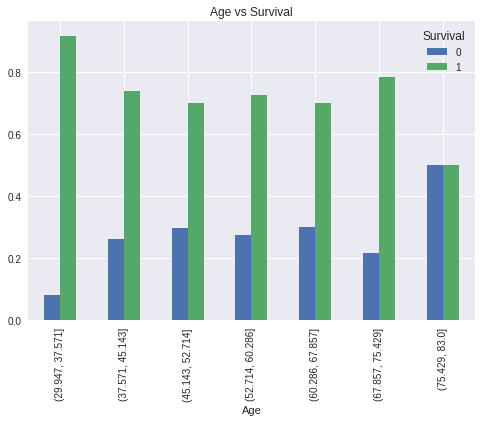

In [118]:
avs = pd.crosstab(age_bins, survivors["Survival"], normalize="index").plot(kind="bar")
avs.set_title("Age vs Survival")

Text(0.5, 1.0, 'Year vs Survival')

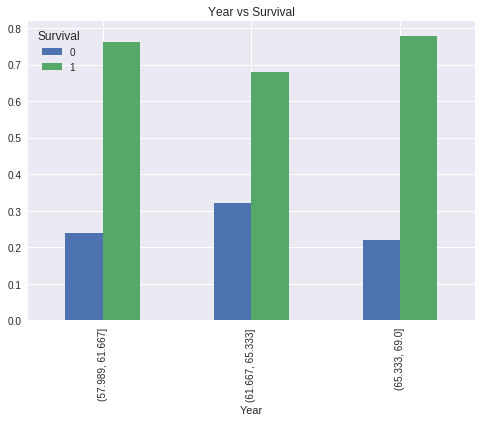

In [102]:
yvs = pd.crosstab(year_bins, survivors["Survival"], normalize="index").plot(kind="bar")
yvs.set_title("Year vs Survival")

Text(0.5, 1.0, 'Nodes vs Survival')

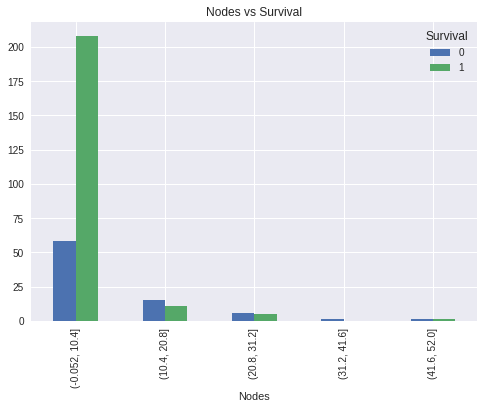

In [103]:
nvs = pd.crosstab(node_bins, survivors["Survival"]).plot(kind="bar")
nvs.set_title("Nodes vs Survival")

Text(0.5, 1.0, 'Year vs Nodes')

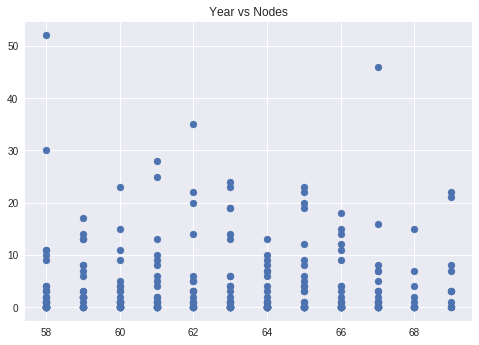

In [108]:
plt.scatter(survivors["Year"], survivors["Nodes"])
plt.title("Year vs Nodes")


Text(0.5, 1.0, 'Age vs Year')

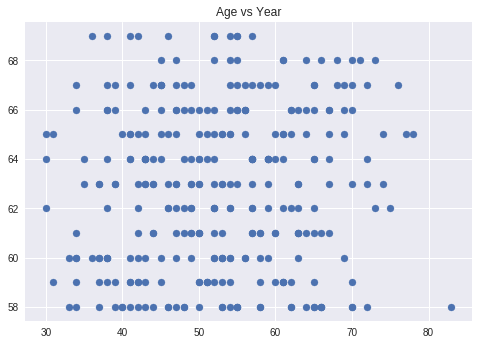

In [120]:
plt.scatter(survivors["Age"], survivors["Year"])
plt.title("Age vs Year")

In [90]:
pd.crosstab(age_bins, [survivors["Survival"], year_bins], normalize="columns")


Survival                      0                                  \
Year           (57.989, 61.667] (61.667, 65.333] (65.333, 69.0]   
Age                                                               
(29.947, 40.6]         0.035714         0.000000       0.176471   
(40.6, 51.2]           0.357143         0.416667       0.352941   
(51.2, 61.8]           0.250000         0.388889       0.352941   
(61.8, 72.4]           0.321429         0.138889       0.117647   
(72.4, 83.0]           0.035714         0.055556       0.000000   

Survival                      1                                  
Year           (57.989, 61.667] (61.667, 65.333] (65.333, 69.0]  
Age                                                              
(29.947, 40.6]         0.224719         0.171053       0.100000  
(40.6, 51.2]           0.303371         0.342105       0.250000  
(51.2, 61.8]           0.314607         0.289474       0.316667  
(61.8, 72.4]           0.157303         0.144737       0.300000  
(72.4, 83.0]           0.000000         0.052632       0.033333

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.



1.   Despite a minor dip in the early 60's, one feature that seems to have a positive relationship with survival is the year in which the operation was being done. This can probably be attributed to advancements in operational procedures and post-operation care during the sixties.
2.   The number of positive axillary nodes detected definitely appears to have a negative relationship with survival after 5 years of the operation. Since the number of nodes indicates a spread of the cancer, it makes sense that those with an increased number of nodes don't tend to survive after 5 years comparitively speaking. Age can also be argued to have a negative relationship with survival rates although the magnitude of this correlation is much less.

1.   There doesn't seem to be a strong correlation between the year of an operation and the number of positive axillary nodes detected in a patient. However, if you disregard some of the outliers, we can see a generally steady decline in patients with large numbers of positive axillary nodes after 1962. What this could mean is that around that time more people were getting better at screening for breast cancer and diagnosing it before it spread. 





